In [12]:
import os
import librosa
import soundfile as sf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

funzione per estrarre features audio

In [13]:
def extract_audio_features(root_folder):
    audio_features = []

    durations = []
    frequencies = []
    amplitudes = []
    num_channels_list = []
    phases = []
    max_internal_frequencies = []
    bit_depths = []

    for root, dirs, files in os.walk(root_folder):
        for filename in files:
            if filename.endswith(('.wav', '.mp3', '.flac')): 
                file_path = os.path.join(root, filename)

                try:
                   
                    file_path = str(file_path)

                    with sf.SoundFile(file_path) as f:
                        num_channels = f.channels
                        bit_depth = sf.info(file_path).subtype_info.split(' ')[0]  

                    y, sr = librosa.load(file_path, sr=None, mono=False)

                    if y.ndim > 1:
                        y = y[0]

                    amplitude = max(abs(y))  
                    duration = librosa.get_duration(y=y, sr=sr)
                    frequency = sr 
                    phase = y[0]  
                    
                    amplitudes.append(amplitude)
                    durations.append(duration)
                    frequencies.append(frequency)
                    num_channels_list.append(num_channels)
                    phases.append(phase)
                    bit_depths.append(bit_depth)

                    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr, n_fft=512)
                    max_idx = magnitudes.argmax()
                    max_time_idx = max_idx // magnitudes.shape[0]
                    max_freq_idx = max_idx % magnitudes.shape[0]
                    max_internal_frequency = pitches[max_freq_idx, max_time_idx]
                    max_internal_frequencies.append(max_internal_frequency)

                    file_name = os.path.splitext(filename)[0]

                    audio_features.append({
                        'Nome file': file_name,
                        'Path del file': file_path,
                        'Ampiezza del segnale': amplitude,
                        'Durata': duration,
                        'Frequenza': frequency,
                        'Numero di canali': num_channels,
                        'Fase': phase,
                        'Frequenza massima interna': max_internal_frequency,
                        'Bit Depth': bit_depth,
                        'Forma d\'onda': y.shape
                    })

                except Exception as e:
                    print(f"Errore durante l'elaborazione del file '{filename}': {e}")

    return audio_features, amplitudes, durations, frequencies, num_channels_list, phases, max_internal_frequencies, bit_depths


salvo dati in un csv

In [14]:
def save_to_csv(data, output_file):
    df = pd.DataFrame(data)

    df.to_csv(output_file, index=False)

istogramma per la durata

In [15]:
def plot_audio_durations_histogram(durations, bins=100):
    plt.figure(figsize=(12, 8))
    sns.histplot(durations, bins=bins, kde=True)
    plt.title('Distribuzione delle durate degli audio')
    plt.xlabel('Durata (secondi)')
    plt.ylabel('Frequenza')
    plt.grid(True)
    plt.show()

istogramma frequenza massima

In [16]:
def plot_audio_max_frequencies_histogram(max_internal_frequencies, bins=100):
    plt.figure(figsize=(12, 8))
    sns.histplot(max_internal_frequencies, bins=bins, kde=True)
    plt.title('Distribuzione delle frequenze massime ')
    plt.xlabel('Frequenza massima')
    plt.ylabel('Valore')
    plt.grid(True)
    plt.show()

boxplot distribuzione

In [17]:
def plot_distribution_boxplot(values, title):
    plt.figure(figsize=(10, 6))
    plt.boxplot(values, vert=False)  # Imposta vert=False per visualizzare il box plot orizzontalmente
    plt.title(title)
    plt.xlabel('Valore')
    plt.grid(True)
    plt.show()

grafici per la distribuzione

In [18]:
def plot_distribution(values, title, x_label):
    # Conta le occorrenze di ciascun valore
    counter = Counter(values)

    # Ordina i valori unici
    unique_values = sorted(counter.keys())
    counts = [counter[value] for value in unique_values]

    # Crea un grafico di distribuzione utilizzando matplotlib
    plt.figure(figsize=(12, 8))
    bar_width = 0.8  # Larghezza delle barre
    indices = range(len(unique_values))

    bars = plt.bar(indices, counts, color='skyblue', edgecolor='black', width=bar_width)

    # Aggiunge le etichette alle barre
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(count), ha='center', va='bottom', fontsize=10)

    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel('Occorrenze', fontsize=14)
    plt.xticks(indices, unique_values, rotation=45, ha='right')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

crea file output

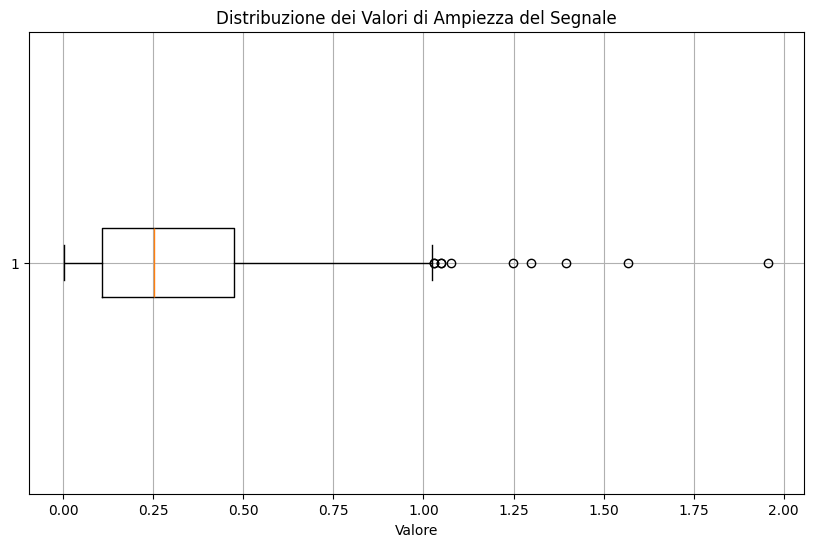

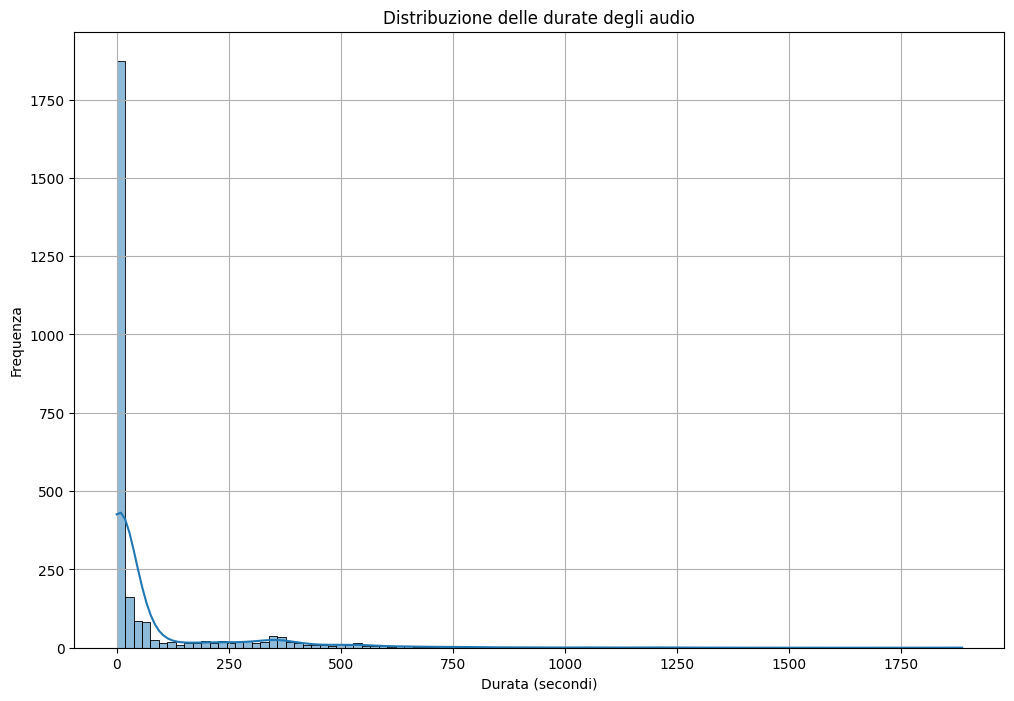

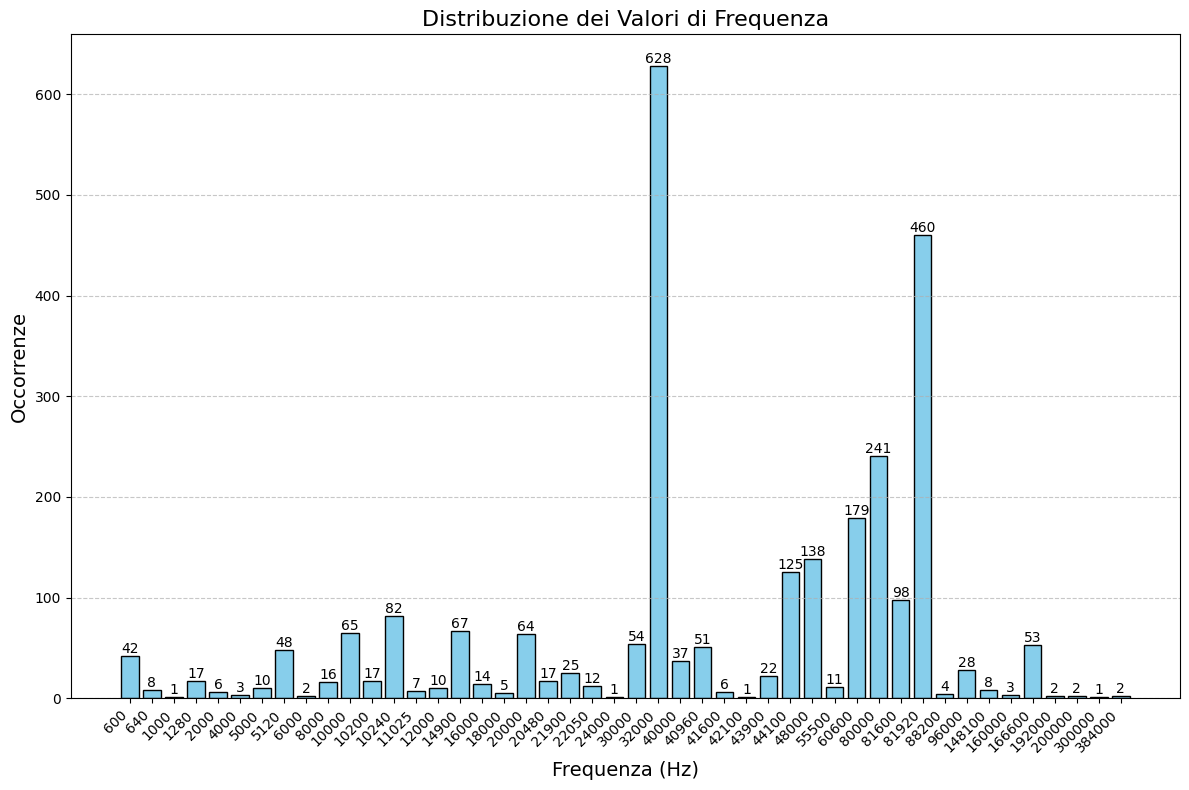

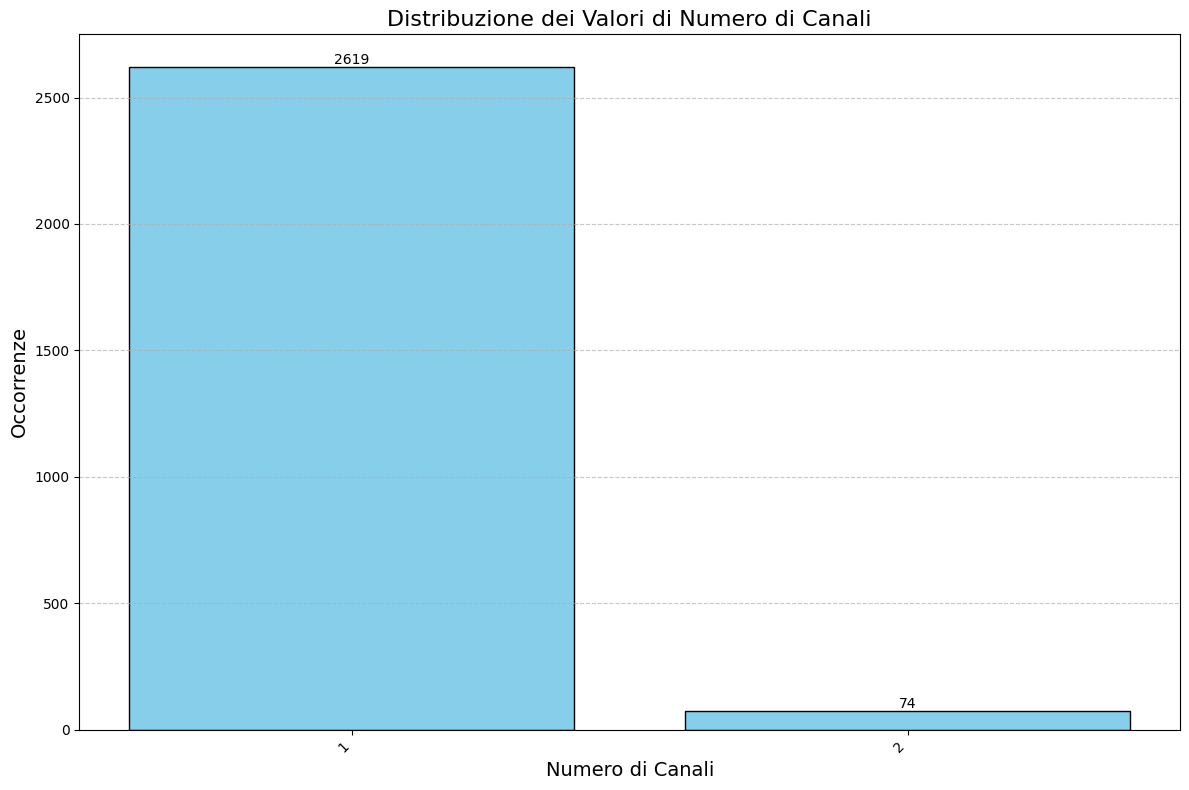

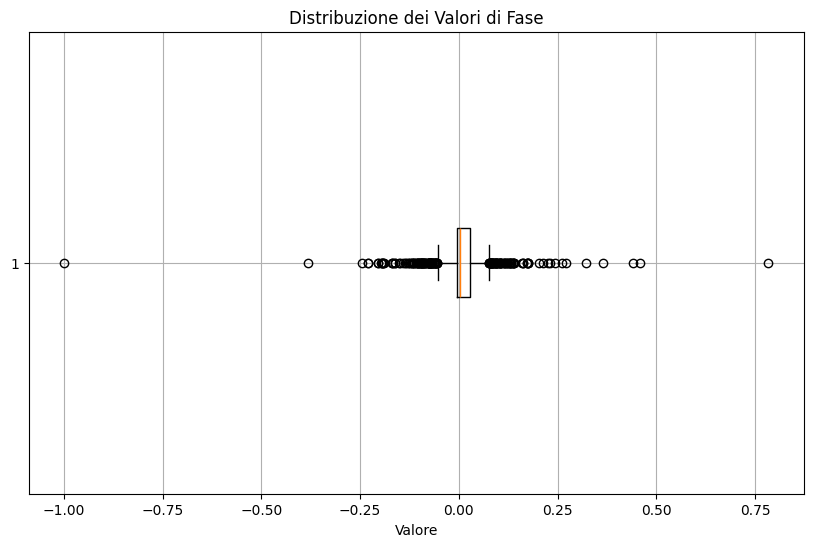

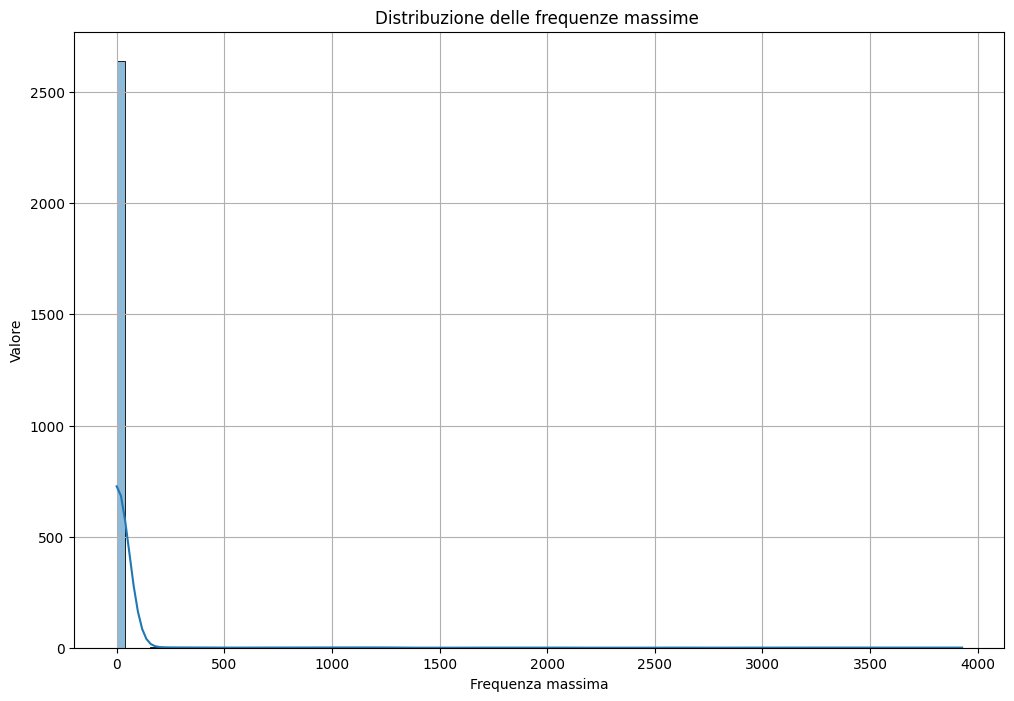

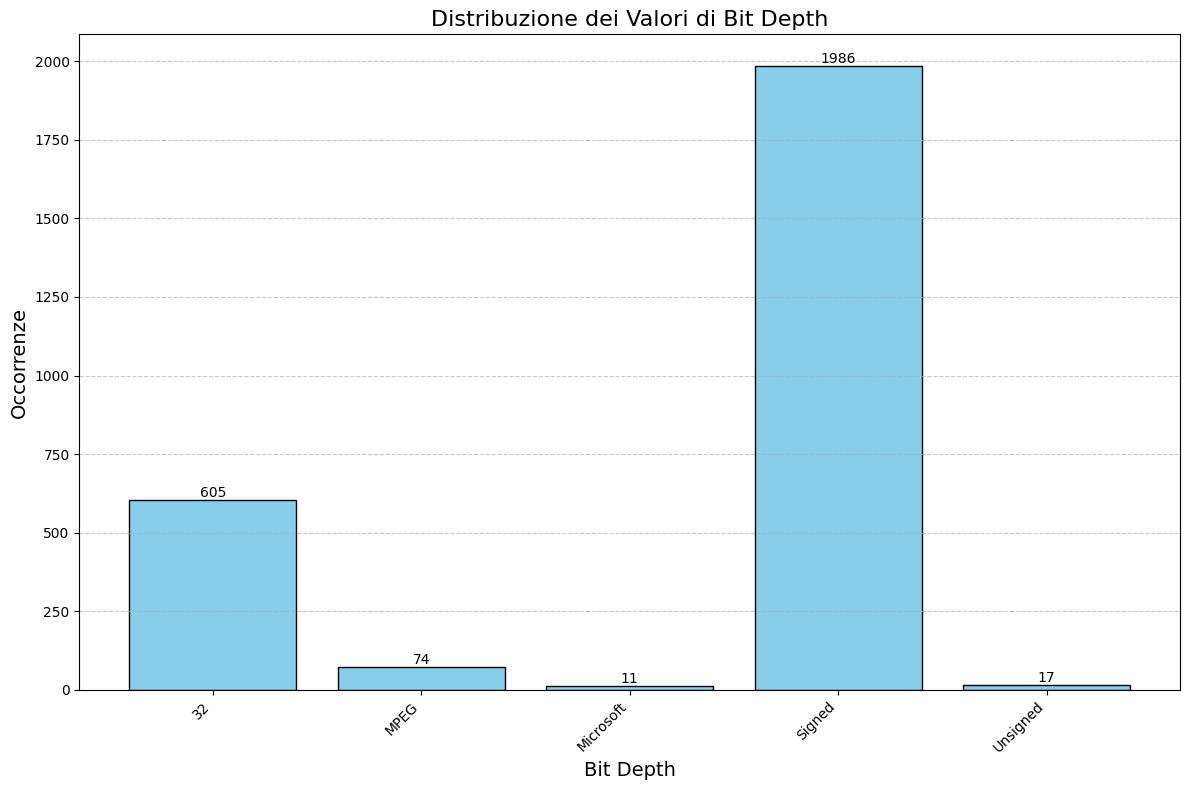

Il file CSV 'audio_features_dataset.csv' è stato creato con successo.


In [19]:
if __name__ == "__main__":
    # Specifica il percorso radice del dataset audio
    dataset_root = 'C://underwater-classification//dataset//'

    # Estrai le informazioni audio dal dataset
    extracted_features, amplitudes, durations, frequencies, num_channels_list, phases, max_internal_frequencies, bit_depths = extract_audio_features(
        dataset_root)

    # Specifica il percorso per salvare il file CSV di output
    output_csv_file = 'audio_features_dataset.csv'

    # Salva le informazioni estratte in un file CSV
    save_to_csv(extracted_features, output_csv_file)

    # Genera i grafici di distribuzione per ciascuna caratteristica
    plot_distribution_boxplot(amplitudes, 'Distribuzione dei Valori di Ampiezza del Segnale')
    plot_audio_durations_histogram(durations)
    plot_distribution(frequencies, 'Distribuzione dei Valori di Frequenza', 'Frequenza (Hz)')
    plot_distribution(num_channels_list, 'Distribuzione dei Valori di Numero di Canali', 'Numero di Canali')
    plot_distribution_boxplot(phases, 'Distribuzione dei Valori di Fase')
    plot_audio_max_frequencies_histogram(max_internal_frequencies)
    plot_distribution(bit_depths, 'Distribuzione dei Valori di Bit Depth', 'Bit Depth')

    print(f"Il file CSV '{output_csv_file}' è stato creato con successo.")
